In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]

# ensure tmask has same dimensions as field
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [4]:
data5 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/01jan18/SalishSea_1h_20180101_20180105_chem_T.nc')
combined_data_dissolved_inorganic_carbon = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_chem_T.nc', 
                                  data_vars = ['dissolved_inorganic_carbon'])
combined_data_total_alkalinity = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_chem_T.nc', 
                                  data_vars = ['total_alkalinity'])

In [5]:
def planview(base, new, field, it, ide, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]).where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]
     ).plot(ax=axs[2], cmap=cm_bwr, 
                                                              vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    for ax in axs:
        viz_tools.set_aspect(ax)

    fig.suptitle(f'Depth {base.deptht[ide].values:.0f} m')

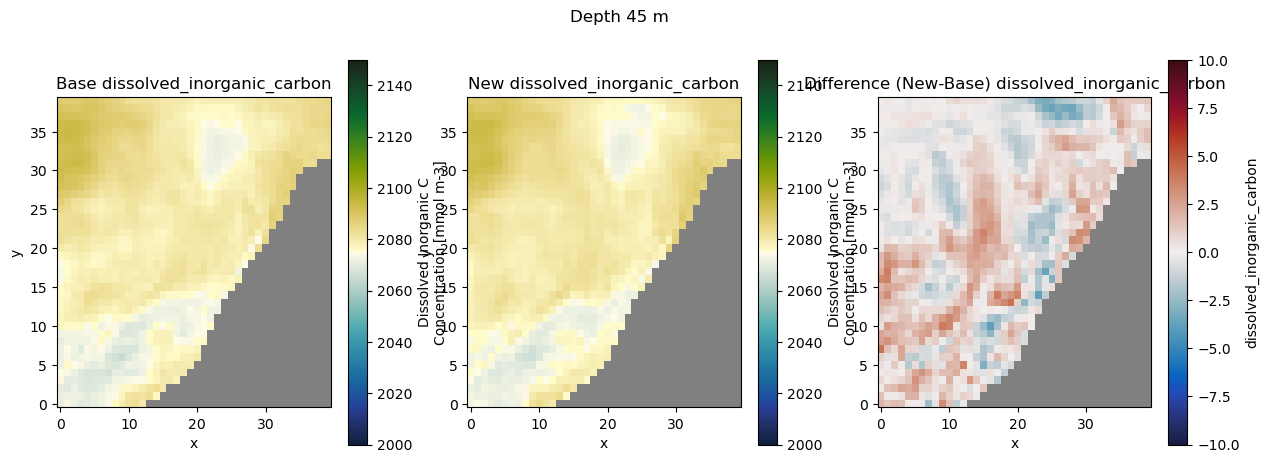

In [6]:
planview(combined_data_dissolved_inorganic_carbon, data5, 'dissolved_inorganic_carbon', 119, 23, cm_delta, 2150, 2000, 10)

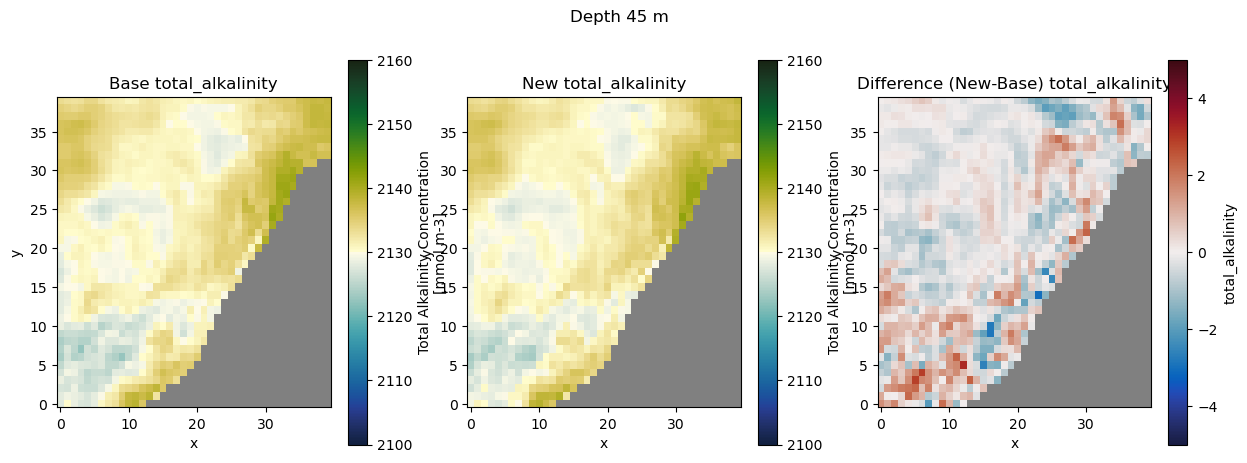

In [10]:
planview(combined_data_total_alkalinity, data5, 'total_alkalinity', 119, 23, cm_delta, 2160, 2100, 5)

In [7]:
def verticalview(base, new, field, it, dep, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, dep, 250+iz:350-iz]-
     base[field][it, :, dep, 250+iz:350-iz]).where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')


    fig.suptitle(f'Vertical view at y = {dep}')

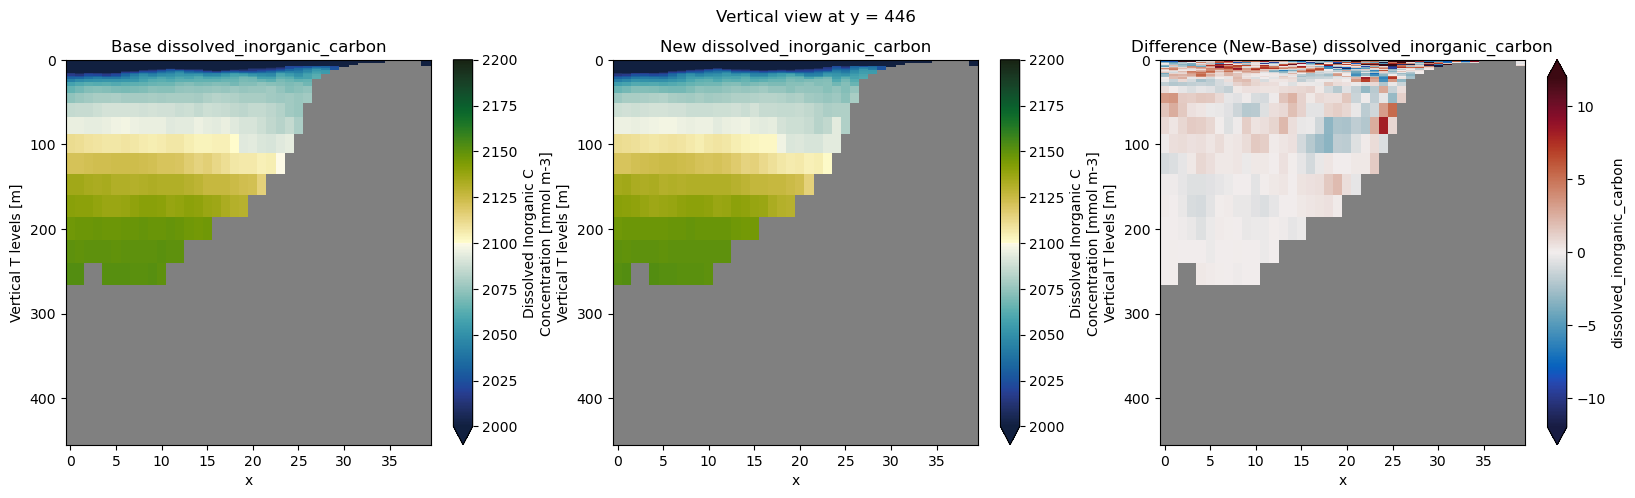

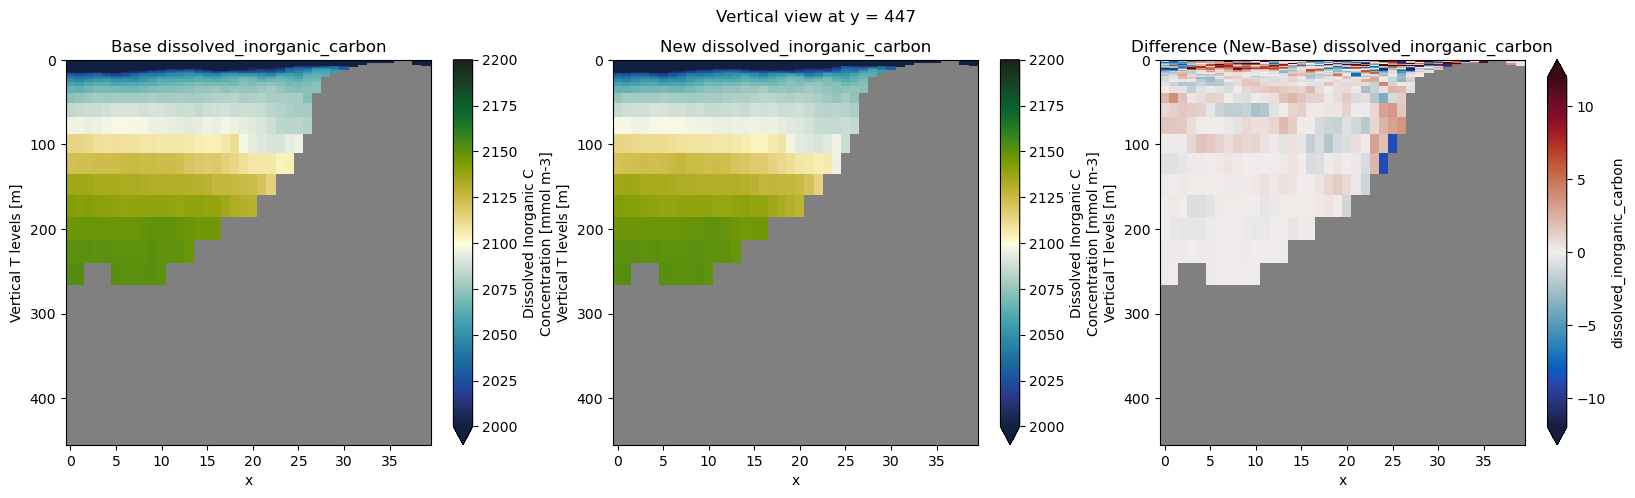

In [8]:
verticalview(combined_data_dissolved_inorganic_carbon, data5, 'dissolved_inorganic_carbon', 119, 446, cm_delta, 2200, 2000, 12)
verticalview(combined_data_dissolved_inorganic_carbon, data5, 'dissolved_inorganic_carbon', 119, 447, cm_delta, 2200, 2000, 12)

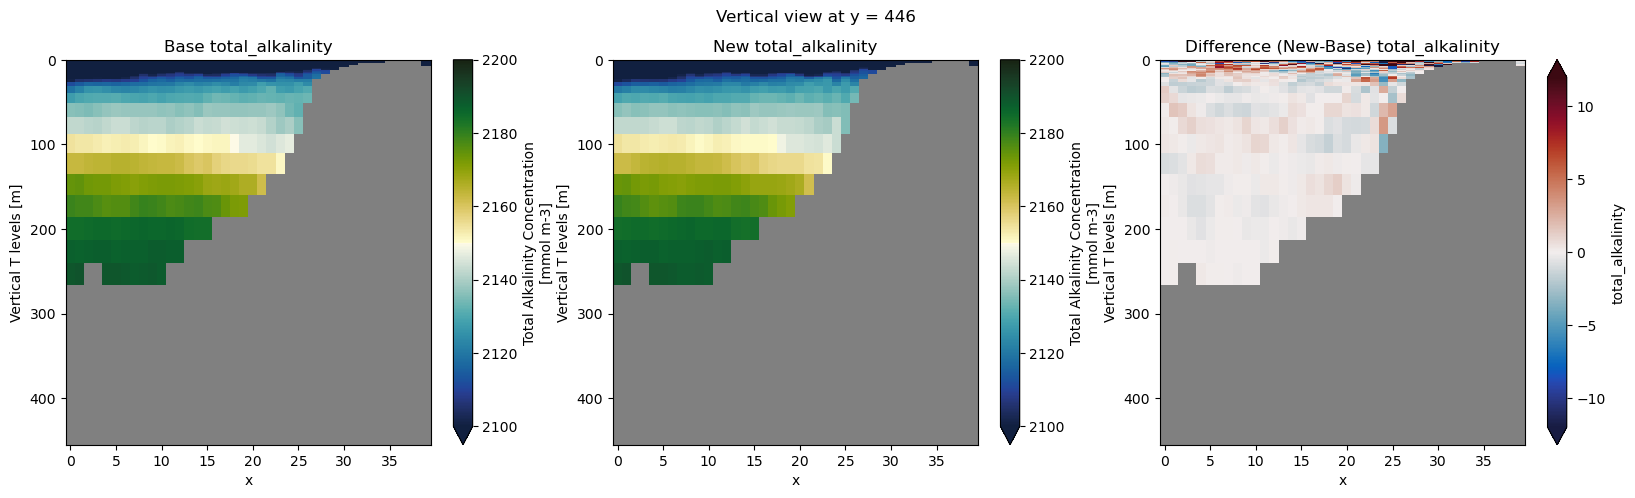

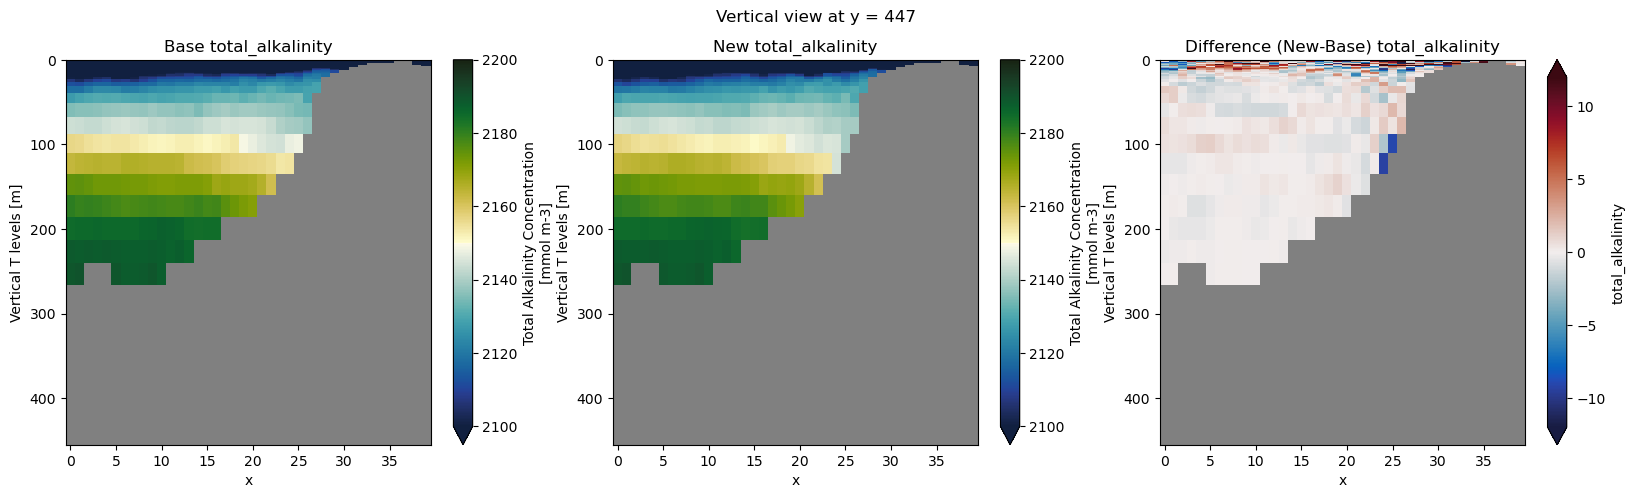

In [10]:
verticalview(combined_data_total_alkalinity, data5, 'total_alkalinity', 119, 446, cm_delta, 2200, 2100, 12)
verticalview(combined_data_total_alkalinity, data5, 'total_alkalinity', 119, 447, cm_delta, 2200, 2100, 12)

In [11]:
def vertical_view_x(base, new, field, it, dep,  cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, 400+iz:500-iz, dep]-
     base[field][it, :, 400+iz:500-iz, dep]).where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Vertical view at x = {dep}')

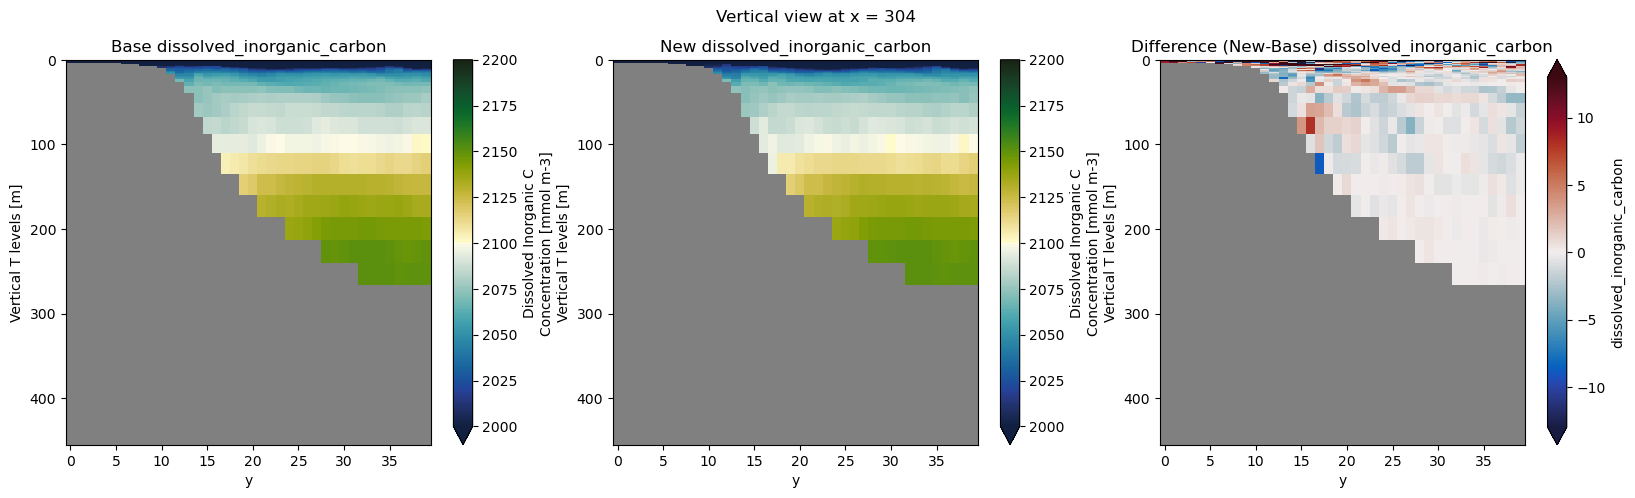

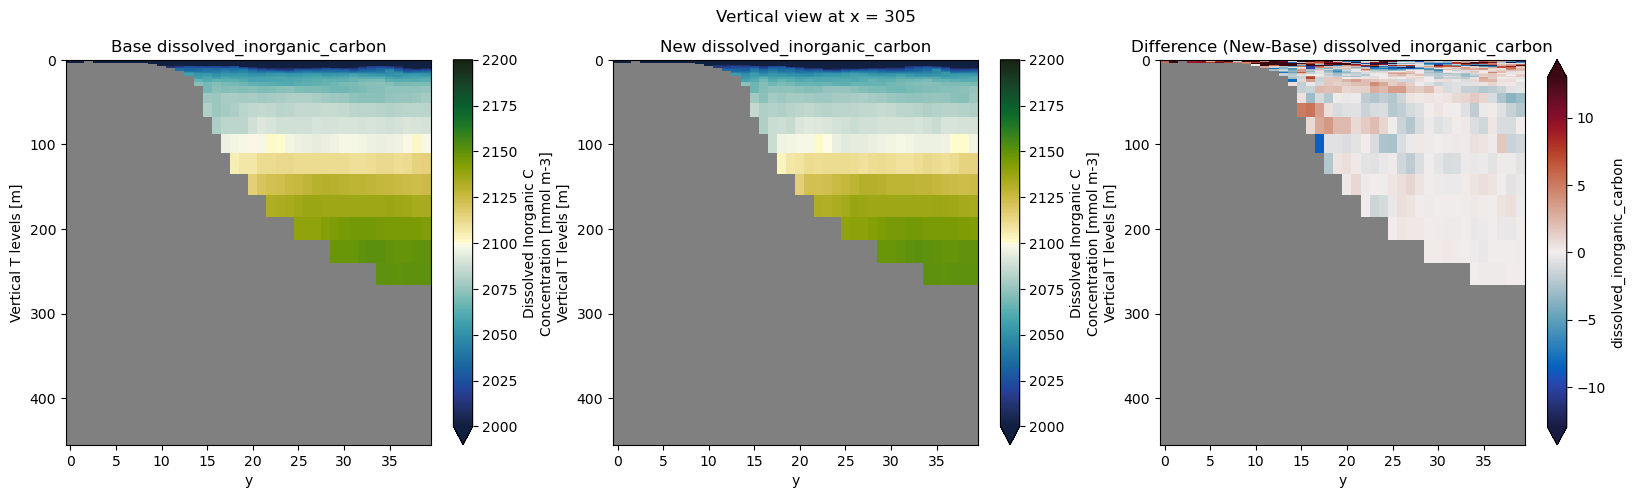

In [13]:
vertical_view_x(combined_data_dissolved_inorganic_carbon, data5, 'dissolved_inorganic_carbon', 119, 304, cm_delta, 2200, 2000, 13)
vertical_view_x(combined_data_dissolved_inorganic_carbon, data5, 'dissolved_inorganic_carbon', 119, 305, cm_delta, 2200, 2000, 13)

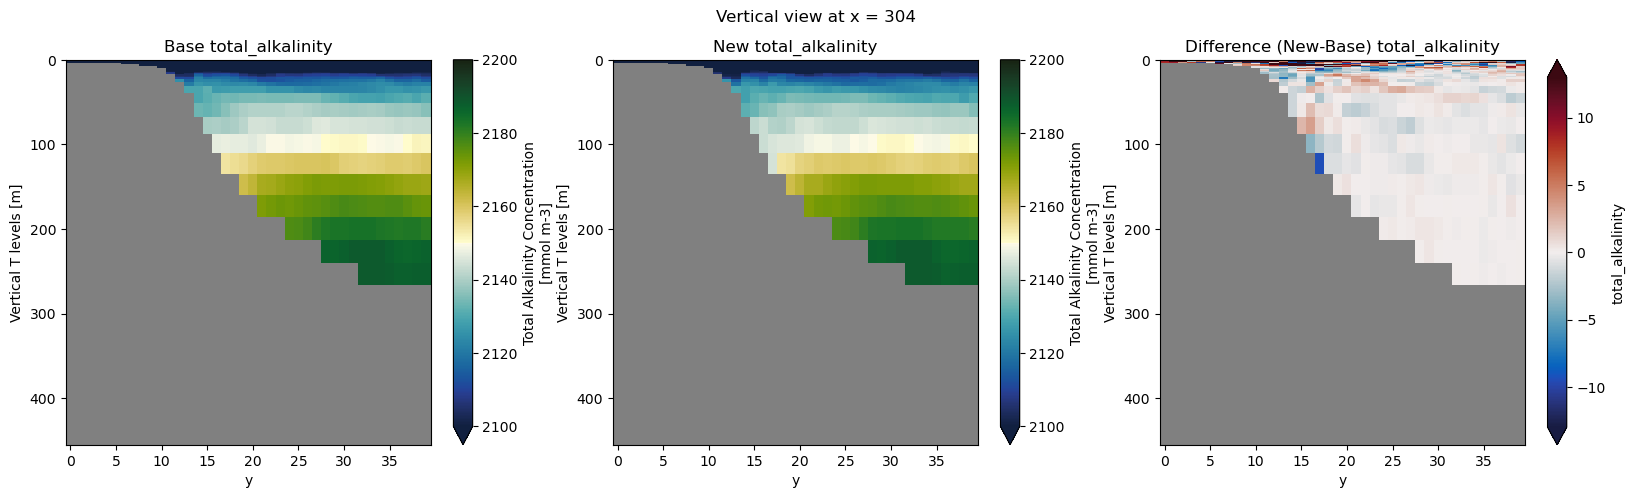

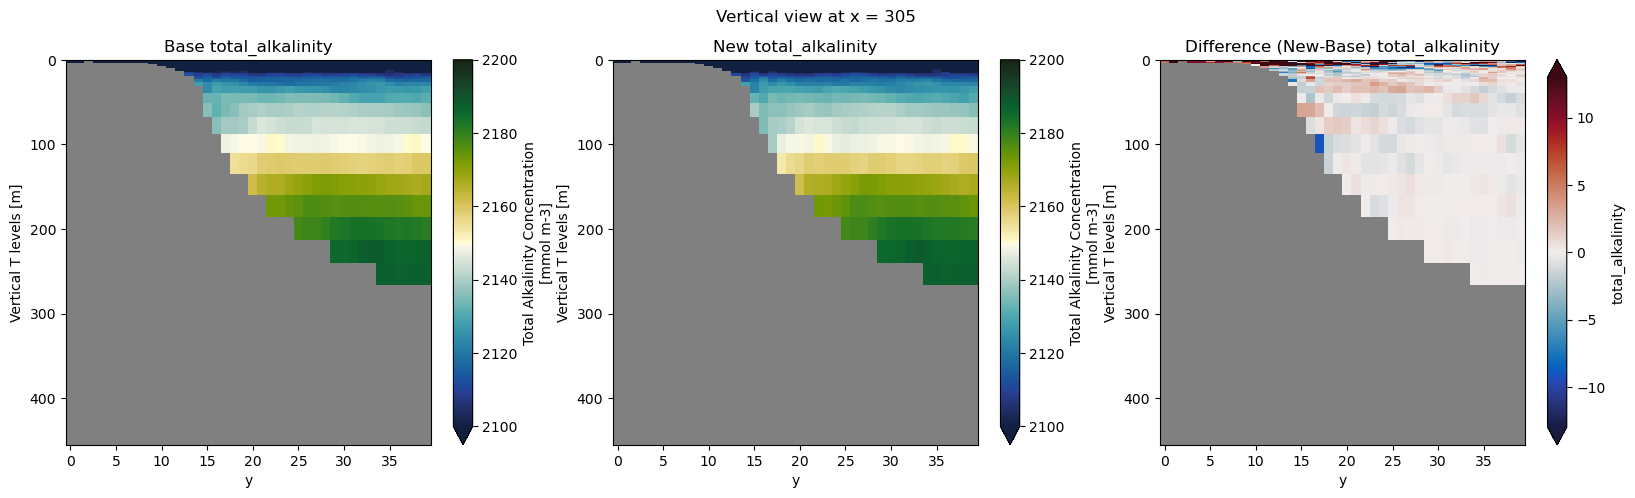

In [14]:
vertical_view_x(combined_data_total_alkalinity, data5, 'total_alkalinity', 119, 304, cm_delta, 2200, 2100, 13)
vertical_view_x(combined_data_total_alkalinity, data5, 'total_alkalinity', 119, 305, cm_delta, 2200, 2100, 13)

In [24]:
def plotSumDiffTime(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    sum_diff.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for Sum of difference for {field}')

In [26]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
depth = slice(0,26)

data5_slice = data5.isel(deptht = depth,y = y_slice, x = x_slice)
combined_data_dissolved_inorganic_carbon_slice = combined_data_dissolved_inorganic_carbon.isel(deptht = depth, y = y_slice, x = x_slice)
combined_data_total_alkalinity_slice = combined_data_total_alkalinity.isel(deptht = depth, y = y_slice, x = x_slice)

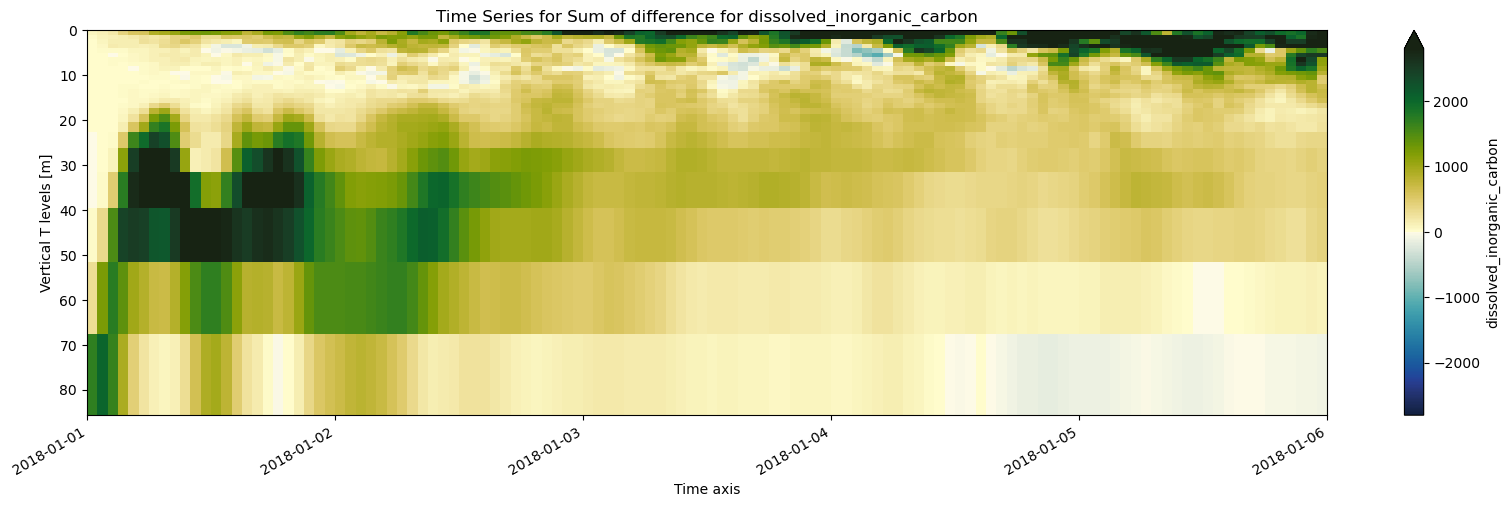

In [27]:
plotSumDiffTime(combined_data_dissolved_inorganic_carbon_slice, data5_slice, 'dissolved_inorganic_carbon', -2800, 2800, cm_delta)

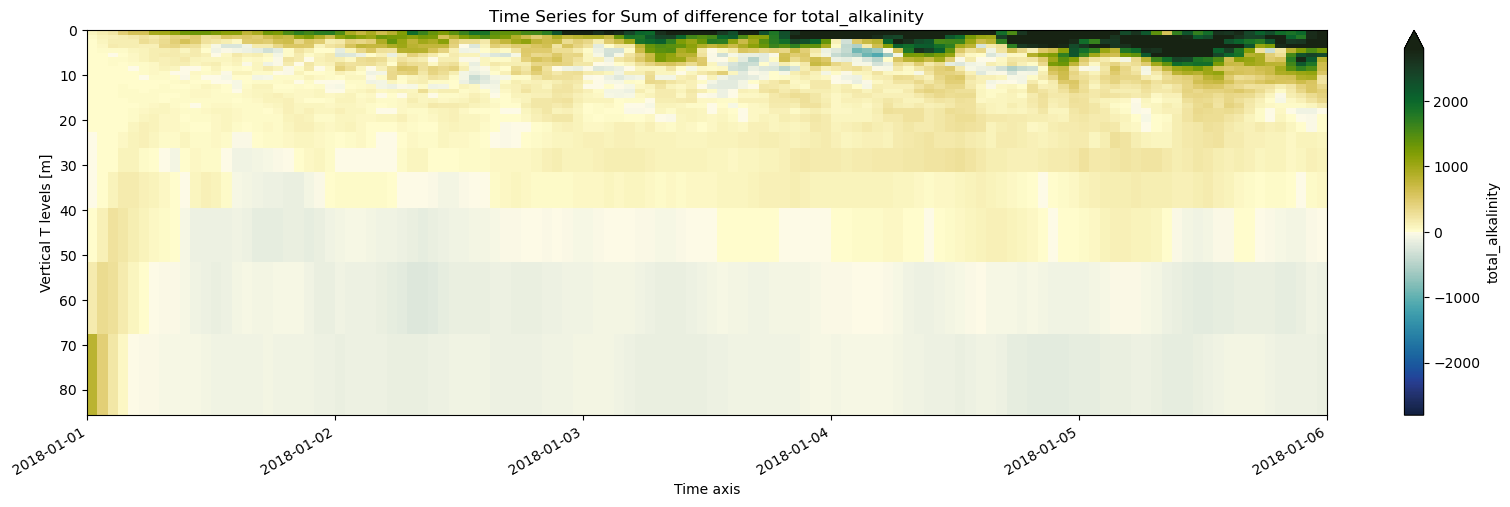

In [28]:
plotSumDiffTime(combined_data_total_alkalinity_slice, data5_slice, 'total_alkalinity', -2800, 2800, cm_delta)